In [1]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense
from keras.preprocessing.text import Tokenizer, text_to_word_sequence, one_hot, hashing_trick
from keras.utils import pad_sequences
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import precision_recall_curve, classification_report
from sklearn.metrics import roc_curve, auc, RocCurveDisplay,roc_auc_score
from wordcloud import WordCloud
from sklearn.preprocessing import LabelBinarizer


In [2]:
raw_numpy = pd.read_csv("numpy.csv")
raw_pandas = pd.read_csv("pandas.csv")
raw_csharp = pd.read_csv("csharp.csv")
raw_matlab = pd.read_csv("matlab.csv")
raw_matplotlib = pd.read_csv("matplotlib.csv")
raw_mongodb = pd.read_csv("mongodb.csv")
raw_tensorflow = pd.read_csv("tensorflow.csv")
raw_typescript = pd.read_csv("typescript.csv")

In [3]:
print(raw_numpy.shape)
print(raw_pandas.shape)
print(raw_csharp.shape)
print(raw_matlab.shape)
print(raw_matplotlib.shape)
print(raw_mongodb.shape)
print(raw_tensorflow.shape)
print(raw_typescript.shape)

(45005, 1)
(47904, 1)
(45664, 1)
(45921, 1)
(43507, 1)
(44070, 1)
(41255, 1)
(47392, 1)


In [4]:
raw_numpy["Tag"]="numpy"
raw_pandas["Tag"]="pandas"
raw_csharp["Tag"]="csharp"
raw_matlab["Tag"]="matlab"
raw_matplotlib["Tag"]="matplotlib"
raw_mongodb["Tag"]="mongodb"
raw_tensorflow["Tag"]="tensorflow"
raw_typescript["Tag"]="typescript"

In [5]:
print(raw_numpy.shape)
print(raw_pandas.shape)
print(raw_csharp.shape)
print(raw_matlab.shape)
print(raw_matplotlib.shape)
print(raw_mongodb.shape)
print(raw_tensorflow.shape)
print(raw_typescript.shape)

(45005, 2)
(47904, 2)
(45664, 2)
(45921, 2)
(43507, 2)
(44070, 2)
(41255, 2)
(47392, 2)


In [6]:
df = pd.concat([raw_numpy, raw_pandas, raw_csharp, raw_matlab, raw_matplotlib, raw_mongodb, raw_tensorflow, raw_typescript], axis=0)
df = df.reset_index(drop=True)
#df = df[pd.notnull(df['Tag'])]
print(df.shape)
df.head()

(360718, 2)


,Questions,Tag
0,numpy savez() of a list of 3D arrays with diff...,numpy
1,'DataFrame' object has no attribute 'Close' in...,numpy
2,How to Look up multiple values for one column ...,numpy
3,What are fastest data types to use as an alter...,numpy
4,rgb2hed not giving the same answer when applie...,numpy


In [7]:
print(df['Questions'].apply(lambda x: len(x.split(' '))).sum())

3636886


In [8]:
def print_plot(index):
    example = df[df.index == index][['Questions', 'Tag']].values[0]
    if len(example) > 0:
        print(example[0])
        print('Tag:', example[1])
print_plot(10)
print_plot(300000)

Sum rows of 2D array with elements of 1D array
Tag: numpy
Running automatic annotation in cvat with tensorflow results in status code 400 "No labels found for tf annotation"
Tag: tensorflow


In [9]:
tokens = df["Questions"].apply(lambda x: word_tokenize(x))
tokens

0         [numpy, savez, (, ), of, a, list, of, 3D, arra...
1         ['DataFrame, ', object, has, no, attribute, 'C...
2         [How, to, Look, up, multiple, values, for, one...
3         [What, are, fastest, data, types, to, use, as,...
4         [rgb2hed, not, giving, the, same, answer, when...
                                ...                        
360713    [How, to, access, angular, Component, from, ot...
360714    [Testing-library, custom, query, Typescript, e...
360715    [React, Native, navigation, (, 4.x, ), props, ...
360716    [TypeORM, duplicate, Key, value, for, ManyToMa...
360717    [Problem, :, sending, object, in, post, reques...
Name: Questions, Length: 360718, dtype: object

In [10]:
words = tokens.apply(lambda x: [w for w in x if w.isalpha()])
words

0         [numpy, savez, of, a, list, of, arrays, with, ...
1         [object, has, no, attribute, in, pandas, How, ...
2         [How, to, Look, up, multiple, values, for, one...
3         [What, are, fastest, data, types, to, use, as,...
4         [not, giving, the, same, answer, when, applied...
                                ...                        
360713    [How, to, access, angular, Component, from, ot...
360714                   [custom, query, Typescript, error]
360715    [React, Native, navigation, props, become, nul...
360716    [TypeORM, duplicate, Key, value, for, ManyToMa...
360717    [Problem, sending, object, in, post, request, ...
Name: Questions, Length: 360718, dtype: object

In [11]:
stop_words = set(stopwords.words('english'))
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [12]:
filtered_words = words.apply(lambda x: [word for word in x if word not in stop_words])
filtered_words

0         [numpy, savez, list, arrays, different, shapes...
1            [object, attribute, pandas, How, fix, problem]
2         [How, Look, multiple, values, one, column, pyt...
3         [What, fastest, data, types, use, alternative,...
4             [giving, answer, applied, full, part, matrix]
                                ...                        
360713    [How, access, angular, Component, Component, d...
360714                   [custom, query, Typescript, error]
360715    [React, Native, navigation, props, become, nul...
360716    [TypeORM, duplicate, Key, value, ManyToMany, r...
360717    [Problem, sending, object, post, request, angu...
Name: Questions, Length: 360718, dtype: object

In [13]:
stemmer = PorterStemmer()
stemmed_words = filtered_words.apply(lambda x: [stemmer.stem(word) for word in x])
stemmed_words

0         [numpi, savez, list, array, differ, shape, fai...
1              [object, attribut, panda, how, fix, problem]
2         [how, look, multipl, valu, one, column, python...
3         [what, fastest, data, type, use, altern, vecto...
4                 [give, answer, appli, full, part, matrix]
                                ...                        
360713       [how, access, angular, compon, compon, duplic]
360714                   [custom, queri, typescript, error]
360715     [react, nativ, navig, prop, becom, null, screen]
360716      [typeorm, duplic, key, valu, manytomani, relat]
360717    [problem, send, object, post, request, angular...
Name: Questions, Length: 360718, dtype: object

In [14]:
clean_sentence = stemmed_words.apply(lambda x: " ".join(x))
clean_sentence

0         numpi savez list array differ shape fail simpl...
1                     object attribut panda how fix problem
2            how look multipl valu one column python duplic
3           what fastest data type use altern vector python
4                        give answer appli full part matrix
                                ...                        
360713              how access angular compon compon duplic
360714                        custom queri typescript error
360715             react nativ navig prop becom null screen
360716             typeorm duplic key valu manytomani relat
360717    problem send object post request angular sprin...
Name: Questions, Length: 360718, dtype: object

In [15]:
df.head()

,Questions,Tag
0,numpy savez() of a list of 3D arrays with diff...,numpy
1,'DataFrame' object has no attribute 'Close' in...,numpy
2,How to Look up multiple values for one column ...,numpy
3,What are fastest data types to use as an alter...,numpy
4,rgb2hed not giving the same answer when applie...,numpy


In [16]:
df["Questions"] = clean_sentence
df.head()

,Questions,Tag
0,numpi savez list array differ shape fail simpl...,numpy
1,object attribut panda how fix problem,numpy
2,how look multipl valu one column python duplic,numpy
3,what fastest data type use altern vector python,numpy
4,give answer appli full part matrix,numpy


In [17]:
# Tokenize the text data and convert it to sequences
max_words = 30000  # Maximum number of words to consider
max_len = 100  # Maximum length of input sequences
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(df.Questions)
sequences = tokenizer.texts_to_sequences(df.Questions)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 34641 unique tokens.


In [18]:
data = pad_sequences(sequences, maxlen=max_len)

In [19]:
# Convert labels to categorical format
num_classes = len(set(df.Tag))
unq_tags = df.Tag.unique()
word_to_label = {word: i for i, word in enumerate(unq_tags)}
labels = [word_to_label[word] for word in df.Tag]
labels = np.asarray(labels)
labels = to_categorical(labels, num_classes=num_classes)
print(labels.shape)
print(unq_tags)
labels

(360718, 8)
['numpy' 'pandas' 'csharp' 'matlab' 'matplotlib' 'mongodb' 'tensorflow'
 'typescript']


array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.15, random_state=42)

In [21]:
# Build the CNN model
model = Sequential()
model.add(Embedding(max_words, 128, input_length=max_len))
model.add(Conv1D(64, 5, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(num_classes, activation='sigmoid'))

In [22]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [23]:
# Train the model
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=32)

Epoch 1/10
7666/7666 [==============================] - 38s 4ms/step - loss: 0.6133 - accuracy: 0.7946 - val_loss: 0.5534 - val_accuracy: 0.8103
Epoch 2/10
7666/7666 [==============================] - 29s 4ms/step - loss: 0.4928 - accuracy: 0.8317 - val_loss: 0.5571 - val_accuracy: 0.8112
Epoch 3/10
7666/7666 [==============================] - 27s 4ms/step - loss: 0.4341 - accuracy: 0.8513 - val_loss: 0.5754 - val_accuracy: 0.8077
Epoch 4/10
7666/7666 [==============================] - 28s 4ms/step - loss: 0.3832 - accuracy: 0.8675 - val_loss: 0.6103 - val_accuracy: 0.8008
Epoch 5/10
7666/7666 [==============================] - 28s 4ms/step - loss: 0.3398 - accuracy: 0.8822 - val_loss: 0.6591 - val_accuracy: 0.7952
Epoch 6/10
7666/7666 [==============================] - 28s 4ms/step - loss: 0.3049 - accuracy: 0.8939 - val_loss: 0.6991 - val_accuracy: 0.7921
Epoch 7/10
7666/7666 [==============================] - 28s 4ms/step - loss: 0.2776 - accuracy: 0.9035 - val_loss: 0.7612 - val_ac

In [24]:
history=model.history

# Evaluate the model
scores = model.evaluate(X_val, y_val, verbose=0)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Test loss: 0.9071944355964661
Test accuracy: 0.7730034589767456


In [25]:
# Generate predictions on test data
y_pred = model.predict(X_test)
print(y_pred.shape)

2255/2255 [==============================] - 2s 914us/step
(72144, 8)


In [26]:
# Assuming you have obtained predicted labels and true labels for your test data
y_pred_labels = np.argmax(y_pred, axis=1)  # Convert predicted probabilities to predicted labels
y_test_labels = np.argmax(y_test, axis=1)  # Convert true label one-hot encodings to true labels


In [27]:
y_pred_2 = to_categorical(y_pred_labels, num_classes=num_classes)
y_pred_2.shape

(72144, 8)

In [28]:
# Create confusion matrix
cm = confusion_matrix(y_test_labels, y_pred_labels)

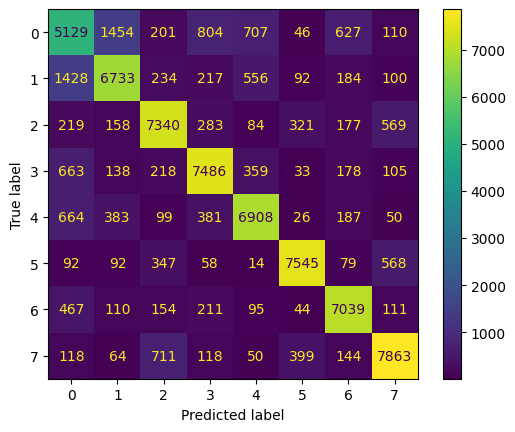

In [29]:
cm_display = ConfusionMatrixDisplay(cm).plot()

In [30]:
a = cm.ravel()
a

array([5129, 1454,  201,  804,  707,   46,  627,  110, 1428, 6733,  234,
        217,  556,   92,  184,  100,  219,  158, 7340,  283,   84,  321,
        177,  569,  663,  138,  218, 7486,  359,   33,  178,  105,  664,
        383,   99,  381, 6908,   26,  187,   50,   92,   92,  347,   58,
         14, 7545,   79,  568,  467,  110,  154,  211,   95,   44, 7039,
        111,  118,   64,  711,  118,   50,  399,  144, 7863], dtype=int64)

In [31]:
print(classification_report(y_test_labels, y_pred_labels,target_names=unq_tags))

              precision    recall  f1-score   support

       numpy       0.58      0.56      0.57      9078
      pandas       0.74      0.71      0.72      9544
      csharp       0.79      0.80      0.80      9151
      matlab       0.78      0.82      0.80      9180
  matplotlib       0.79      0.79      0.79      8698
     mongodb       0.89      0.86      0.87      8795
  tensorflow       0.82      0.86      0.84      8231
  typescript       0.83      0.83      0.83      9467

    accuracy                           0.78     72144
   macro avg       0.78      0.78      0.78     72144
weighted avg       0.78      0.78      0.78     72144



In [32]:
y_test_labels

array([6, 0, 0, ..., 7, 3, 7], dtype=int64)

In [33]:
label_binarizer = LabelBinarizer().fit(y_train)
y_onehot_test = label_binarizer.transform(y_test)
y_onehot_test.shape  # (n_samples, n_classes)

(72144, 8)

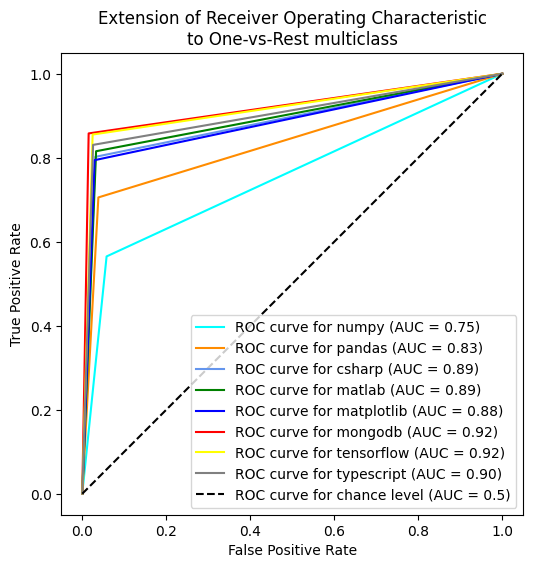

In [34]:
from itertools import cycle
fig, ax = plt.subplots(figsize=(6, 6))


colors = cycle(["aqua", "darkorange", "cornflowerblue", "green", "blue", "red", "yellow", "grey"])
for class_id, color in zip(range(8), colors):
    RocCurveDisplay.from_predictions(
        y_onehot_test[:, class_id],
        y_pred_2[:, class_id],
        name=f"ROC curve for {unq_tags[class_id]}",
        color=color,
        ax=ax,
    )

plt.plot([0, 1], [0, 1], "k--", label="ROC curve for chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Extension of Receiver Operating Characteristic\nto One-vs-Rest multiclass")
plt.legend()
plt.show()

In [35]:
print(history.params)
print(history.history.keys())

{'verbose': 1, 'epochs': 10, 'steps': 7666}
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


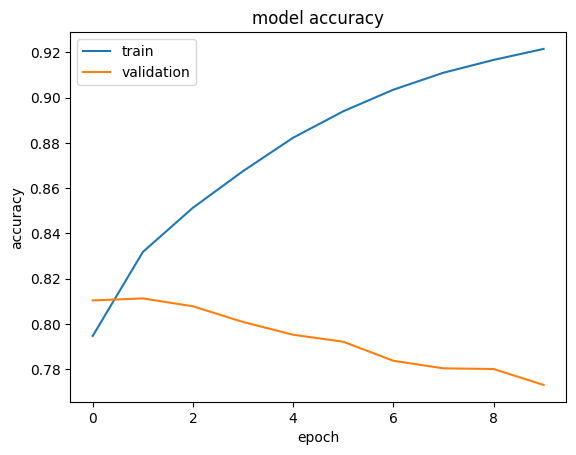

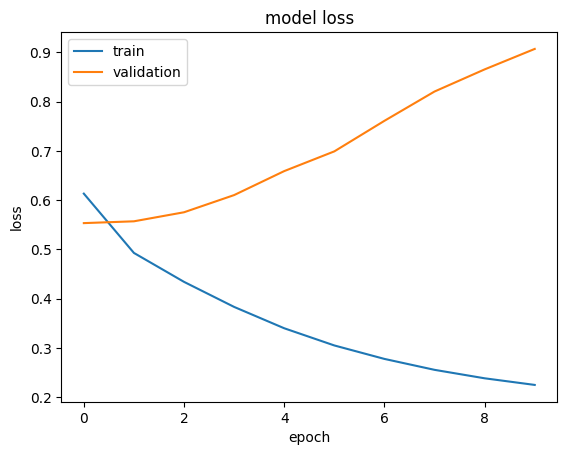

In [36]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()